Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Новоселова Мария

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()

def clear_data(data):
    current_date = datetime.today().date()
    current_date = f'{current_date.day}.{current_date.month}'

    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']
    weather_code = data['current']['weather_code']

    if weather_code == 2:
        weather = 'нет осадков, ясно'
    elif weather_code in [45, 48]:
        weather = 'нет осадков, туман'
    else:
        weather = 'выгляни в окно и посмотри сам'

    message = f'Сегодня ({current_date}) погода {temperature}{temperature_format}, {weather}'

    return message


def main(params):
    url = f'https://api.open-meteo.com/v1/forecast?latitude={params[0]}&longitude={params[1]}&current=temperature_2m,weather_code&timezone=Europe%2FMoscow&forecast_days=1'
    data = send_request(url)
    message = clear_data(data)
    print(message)


params = input('Введите координаты:').split(', ')
main(params)

Введите координаты:56.50, 60.35
Сегодня (30.10) погода 1.2°C, нет осадков, ясно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
from os import name
import requests


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()


def pokemons(url):
    name = []
    for i in send_request(url)['results']:
        name.append(i['name'])
    return name


def get_pokemon_info(pokemon_name):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        name = data['name']
        types = [type_['type']['name'] for type_ in data['types']]
        weight = data['weight']
        height = data['height']
        abilities = [ability['ability']['name'] for ability in data['abilities']]

        return {
            'name': name,
            'types': types,
            'weight': weight,
            'height': height,
            'abilities': abilities
        }
    else:
        print(f"Ошибка при получении данных: {response.status_code}")
        return None


url = f'https://pokeapi.co/api/v2/pokemon'
print('Список покемонов:',pokemons(url))
chosen_pokemon = input("\nВведите имя покемона: ").lower()
pokemon_info = get_pokemon_info(chosen_pokemon)
if pokemon_info is not None:
    print(f"\nИнформация о покемоне {chosen_pokemon.capitalize()}:")
    print(f"Имя: {pokemon_info['name'].capitalize()}")
    print(f"Тип: {' '.join(pokemon_info['types']).capitalize()}")
    print(f"Вес: {pokemon_info['weight']} г.")
    print(f"Рост: {pokemon_info['height']} см.")
    print(f"Способности: {' '.join(pokemon_info['abilities']).capitalize()}")
else:
    print(f"Покемон '{chosen_pokemon}' не найден в списке.")



Список покемонов: ['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']

Введите имя покемона: charmeleon

Информация о покемоне Charmeleon:
Имя: Charmeleon
Тип: Fire
Вес: 190 г.
Рост: 11 см.
Способности: Blaze solar-power


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()


def posts(url):
    for i in send_request(url):
        print('-',i['title'],'\n',i['body'],end='\n')


def posts_id(url):
    response = requests.get(url)
    if response.status_code == 200:
        resp = response.json()
    id=int(input())
    for i in resp:
        if i['id']==id:
            for k,v in i.items():
                print(k,':',v)




url = f' https://jsonplaceholder.typicode.com/posts'
print(posts(url),posts_id(url))

- sunt aut facere repellat provident occaecati excepturi optio reprehenderit 
 quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
- qui est esse 
 est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae ea dolores neque
fugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis
qui aperiam non debitis possimus qui neque nisi nulla
- ea molestias quasi exercitationem repellat qui ipsa sit aut 
 et iusto sed quo iure
voluptatem occaecati omnis eligendi aut ad
voluptatem doloribus vel accusantium quis pariatur
molestiae porro eius odio et labore et velit aut
- eum et est occaecati 
 ullam et saepe reiciendis voluptatem adipisci
sit amet autem assumenda provident rerum culpa
quis hic commodi nesciunt rem tenetur doloremque ipsam iure
quis sunt voluptatem rerum illo velit
- nesciunt quas odio 
 repudiandae veniam quaerat sunt sed
alias aut fugiat sit autem sed est

## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


def create_post(title, body, user_id):
    url = "https://jsonplaceholder.typicode.com/posts"
    data = {
        'userId': user_id,
        'title': title,
        'body': body
    }

    response = requests.post(url, json=data)

    if response.status_code == 201:
        return response.json()
    else:
        print(f"Ошибка при создании поста. Код статуса: {response.status_code}")
        return None


def update_post(your_id, post_id, new_title, new_body,):
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"

    data = {
        'userId':your_id,
        'id': post_id,
        'title': new_title,
        'body': new_body
    }

    response = requests.put(url, json=data)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Ошибка при обновлении поста. Код статуса: {response.status_code}")
        return None


def delete_post(post_id):
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"

    response = requests.delete(url)

    if response.status_code == 200:
        return response.status_code
    else:
        print(f"Ошибка при удалении поста. Код статуса: {response.status_code}")
        return None


title = input("Введите заголовок: ")
body = input("Введите содержание поста: ")
user_id = int(input("Введите ID пользователя: "))
created_post = create_post(title, body, user_id)
if created_post:
    print("Пост успешно создан:")
    print(created_post)


post_id = int(input("Введите ID поста для обновления: "))
your_id = int(input('Введите ваш ID'))
new_title = input("Введите новый заголовок: ")
new_body = input("Введите новое содержание поста: ")
updated_post = update_post(your_id, post_id, new_title, new_body)
if updated_post:
    print("Пост успешно обновлен:")
    print(updated_post)

post_id_to_delete = int(input("\nВведите ID поста для удаления: "))
status_code = delete_post(post_id_to_delete)
if status_code:
    print(f"Пост успешно удален. Статус код: {status_code}")

Введите заголовок: Новый заголовок
Введите содержание поста: Тут должно находиться содержимое нового поста...
Введите ID пользователя: 10
Пост успешно создан:
{'userId': 10, 'title': 'Новый заголовок', 'body': 'Тут должно находиться содержимое нового поста...', 'id': 101}
Введите ID поста для обновления: 1
Введите ваш ID1
Введите новый заголовок: новый
Введите новое содержание поста: новое
Пост успешно обновлен:
{'userId': 1, 'id': 1, 'title': 'новый', 'body': 'новое'}

Введите ID поста для удаления: 23
Пост успешно удален. Статус код: 200


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



1.affenpinscher
2.african
3.airedale
4.akita
5.appenzeller
6.australian
7.bakharwal
8.basenji
9.beagle
10.bluetick
11.borzoi
12.bouvier
13.boxer
14.brabancon
15.briard
16.buhund
17.bulldog
18.bullterrier
19.cattledog
20.cavapoo
21.chihuahua
22.chippiparai
23.chow
24.clumber
25.cockapoo
26.collie
27.coonhound
28.corgi
29.cotondetulear
30.dachshund
31.dalmatian
32.dane
33.danish
34.deerhound
35.dhole
36.dingo
37.doberman
38.elkhound
39.entlebucher
40.eskimo
41.finnish
42.frise
43.gaddi
44.germanshepherd
45.greyhound
46.groenendael
47.havanese
48.hound
49.husky
50.keeshond
51.kelpie
52.kombai
53.komondor
54.kuvasz
55.labradoodle
56.labrador
57.leonberg
58.lhasa
59.malamute
60.malinois
61.maltese
62.mastiff
63.mexicanhairless
64.mix
65.mountain
66.mudhol
67.newfoundland
68.otterhound
69.ovcharka
70.papillon
71.pariah
72.pekinese
73.pembroke
74.pinscher
75.pitbull
76.pointer
77.pomeranian
78.poodle
79.pug
80.puggle
81.pyrenees
82.rajapalayam
83.redbone
84.retriever
85.ridgeback
86.rottweile

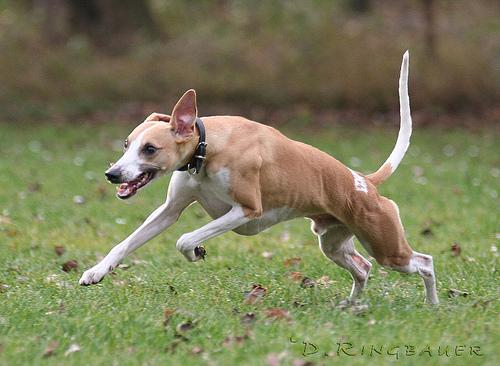

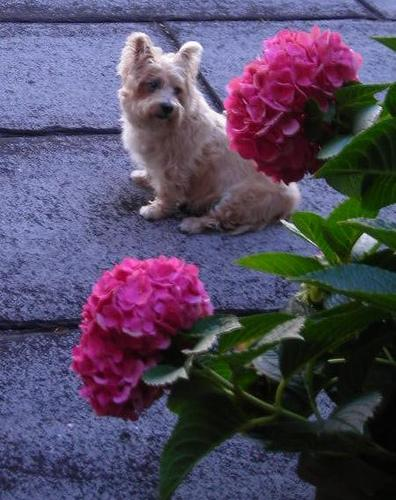

None


In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def get_breeds_list():
    url = "https://dog.ceo/api/breeds/list/all"
    response = requests.get(url)

    if response.status_code == 200:
        breeds_dict = response.json()["message"]
        breeds_list = list(breeds_dict.keys())
        for i in range(len(breeds_list)):
            print(str(i+1)+'.'+breeds_list[i])


def input_breeds():
    user_input = input("Введите породы собак через запятую: ")
    breeds = [breed.strip().lower() for breed in user_input.split(",")]
    return breeds


def fetch_and_display_images(breeds):
    base_url = "https://dog.ceo/api/breed/{}/images/random"

    for breed in breeds:
        url = base_url.format(breed)
        response = requests.get(url)

        if response.status_code == 200:
            image_url = response.json()["message"]

            res = requests.get(image_url)
            img = Image.open(io.BytesIO(res.content))
            display(img)


print(get_breeds_list())
print(fetch_and_display_images(input_breeds()))

